In [1]:
from mkad import *
from tqdm import tqdm_notebook as tqdm
from copy import deepcopy
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
mkad = MultipleKernelAnomalyDetector(sax_size=4, paa_size=8, nu=0.05)

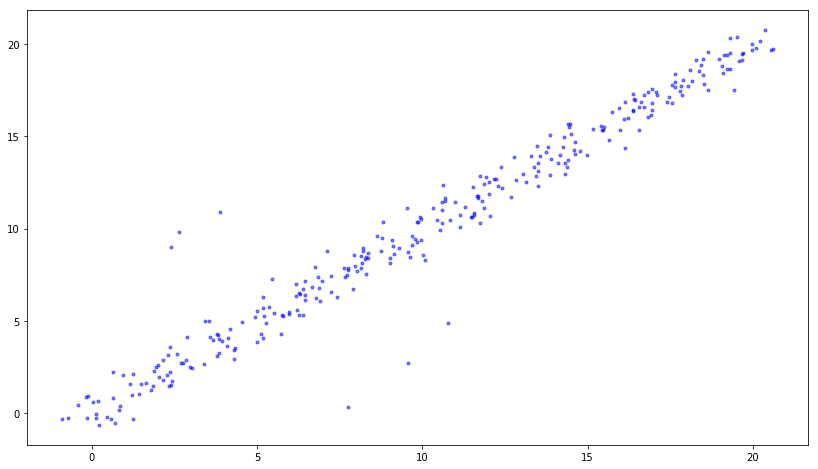

In [145]:
F = 10
T = 2
N = 30

data = np.zeros((F, T, N))

for f in range(F):
    for t in range(T):
        data[f][t] = np.linspace(start=0, stop=20, num=N) + sps.norm.rvs(size=N, scale=0.5)
        
anomalies = [(5, 3), (5, 4), (6, 7), (6, 2), (6, 4), (5, 5)]
for a in anomalies:
    if a[0] % 2 == 0:
        data[a[0]][0][a[1]] += 7
    else:
        data[a[0]][1][a[1]] += 7
        
    
plt.figure(figsize=(14, 8))
for i in range(F):
    plt.plot(data[i][0], data[i][1], '.', color='blue', alpha=0.5)
anoms = []
for a in anomalies:
    anoms.append()
for anomaly in anomalies:
    plt.plot(data[anomaly[0]][0][anomaly[1]], data[anomaly[0]][0][anomaly[1]], color='red')
plt.show()

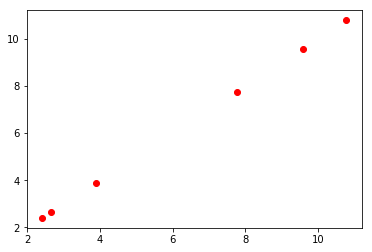

In [150]:
for anomaly in anomalies:
    plt.scatter(data[anomaly[0]][0][anomaly[1]], data[anomaly[0]][0][anomaly[1]], color='red')

In [152]:
data[anomaly[0]][0][anomaly[1]]

3.8833710287384373

In [148]:
data[anomaly[0]][0][anomaly[1]]

3.8833710287384373

In [386]:
mkad = MultipleKernelAnomalyDetector(kernel='lcs', sax_size=4, paa_size=7)
mkad.fit(data)
pred = mkad.predict(data)
pred

array([-1,  1,  1,  1,  1, -1,  1,  1,  1,  1])

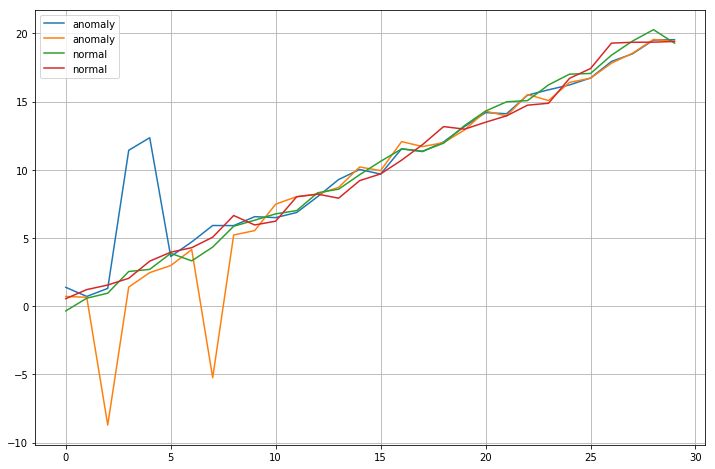

In [400]:
plt.figure(figsize=(12,8))
plt.plot(data[0][0], label='anomaly')
plt.plot(data[5][0], label='anomaly')
plt.plot(data[1][0], label='normal')
plt.plot(data[2][0], label='normal')
plt.legend()
plt.grid(True)
plt.show()

### MNIST anomalies example 1

In [10]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print('X размера', X_train.shape, 'y размера', y_train.shape)
X_train = X_train.reshape(-1, 28, 28)
X_train.shape

X размера (50000, 1, 28, 28) y размера (50000,)


(50000, 28, 28)

Посмотрим на аномальные примеры в написании цифр

In [11]:
N = 200

In [12]:
X_sample = X_train[y_train == 5][:N]
y_sample = y_train[y_train == 5][:N]
X_sample.shape

(200, 28, 28)

In [13]:
mkad.fit(X_sample)

In [14]:
pred = mkad.predict(X_sample)

In [15]:
Counter(pred)

Counter({-1: 13, 1: 187})

In [16]:
X_sample.shape

(200, 28, 28)

In [116]:
X_sample_tsne = X_sample.reshape((N, 784))
X_transformed = TSNE(n_components=2).fit_transform(X_sample_tsne)

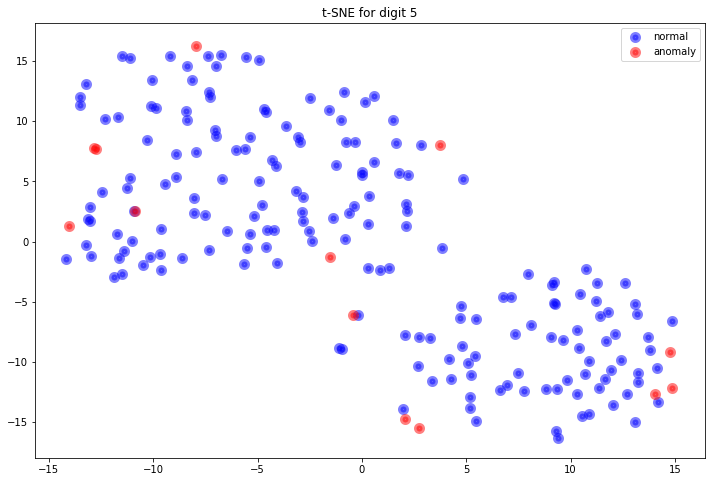

In [119]:
plt.figure(figsize=(12,8))
plt.title('t-SNE for digit 5')
plt.scatter(X_transformed[pred==1][:,0], X_transformed[pred==1][:,1], marker='o', color='blue', 
            linewidths=5, alpha=0.5, label='normal')
plt.scatter(X_transformed[pred==-1][:,0], X_transformed[pred==-1][:,1], marker='o', c='red', 
            linewidths=5, alpha=0.5, label='anomaly')
plt.legend()
plt.show()

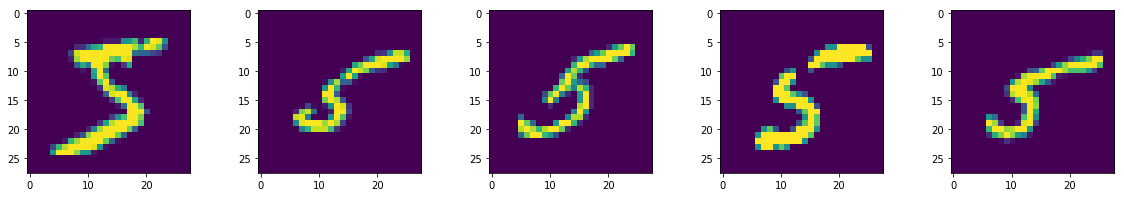

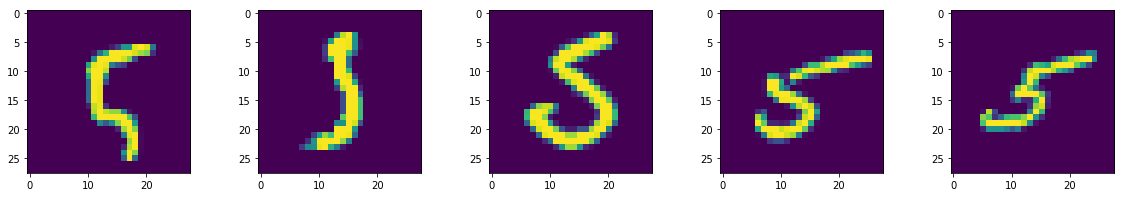

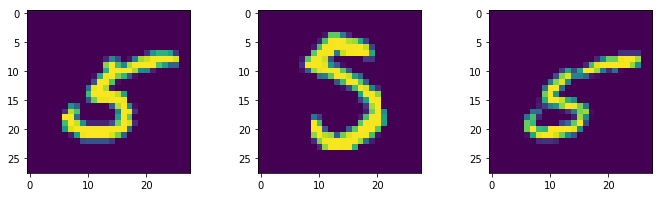

In [17]:
for i, item in enumerate(X_sample[pred==-1]):
    if i % 5 == 0:
        plt.figure(figsize=(20, 3))
    plt.subplot(1, 5, i % 5 + 1)
    plt.imshow(X_sample[i])
    if i % 5 == 4:
        plt.show()

In [192]:
good_5s = [10, 15, 18, 24, 26, 27, 36, 40, 61, 62, 65, 68, 73, 77, 94]

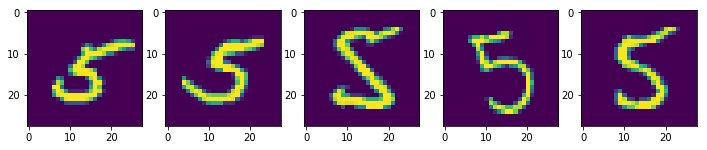

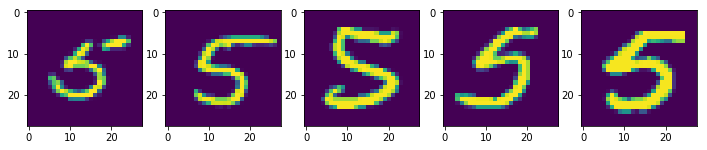

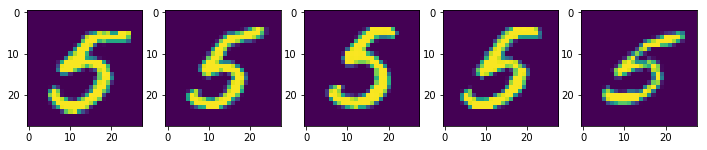

In [193]:
for i, item in enumerate(good_5s):
    if i % 5 == 0:
        plt.figure(figsize=(12, 3))
    plt.subplot(1, 5, i % 5 + 1)
    plt.imshow(X_sample[item])
    if i % 5 == 4:
        plt.show()